In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [44]:
class_names = ['bird', 'elephant', 'person', 'wild_boar']
img_height , img_width , color_mode = 180,180,"grayscale"


1/1 [==============================] - 0s 74ms/step
[-3.7934606e+00 -9.4044290e-04 -2.5037496e+00  7.8463011e+00]
animal : bird | accuracy :  0.0
animal : elephant | accuracy :  0.04
animal : person | accuracy :  0.0
animal : wild_boar | accuracy :  99.96


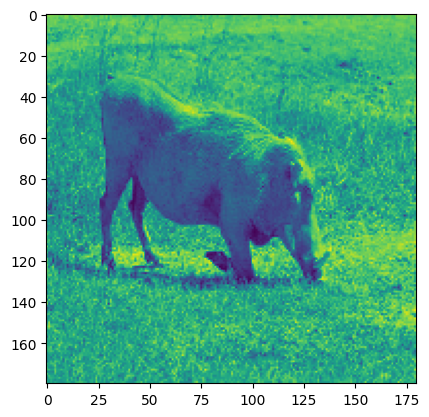

In [47]:
img = tf.keras.utils.load_img(
    "test/boar.jpg",
    target_size = (img_height,img_width),
    color_mode = color_mode 
)

model = tf.keras.models.load_model('trained_models/model-0.8748-(h-det).h5')

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(predictions[0])

print(f"animal : {class_names[0]} | accuracy :  {round(np.array(score)[0] * 100,2)}")
print(f"animal : {class_names[1]} | accuracy :  {round(np.array(score)[1] * 100,2)}")
print(f"animal : {class_names[2]} | accuracy :  {round(np.array(score)[2] * 100,2)}")
if len(class_names) > 3 :
    print(f"animal : {class_names[3]} | accuracy :  {round(np.array(score)[3] * 100,2)}")
plt.imshow(img)


1/1 [==============================] - 0s 22ms/step


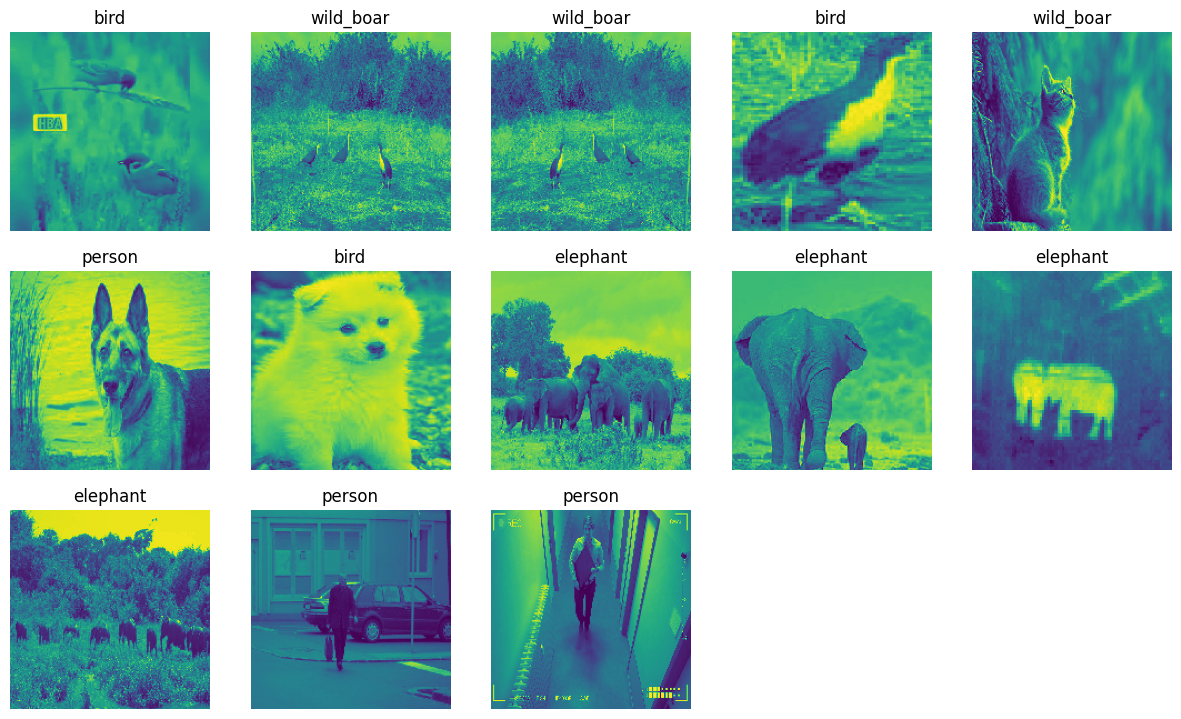

In [46]:
plt.figure(figsize=(15, 15))

for i,file in enumerate(os.listdir('test')):
    img = tf.keras.utils.load_img(
    f'test/{file}',
    target_size = (img_height,img_width),
    color_mode = color_mode 
    )


    img_array = tf.keras.utils.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(class_names[score.numpy().argmax()])
    plt.axis("off")